In [1]:
import requests
import json
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
query = """query trades{
  swaps(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, orderBy: timestamp, orderDirection: desc, first: 1000,block:{number:12683886}) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    amountUSD
		
    pair {
      token0 {
        id
        symbol
      }
      token1 {
        id
        symbol
      }
      volumeUSD
      liquidityProviderCount
  		id
    }
    transaction {
      blockNumber
    }
  }
}"""


In [3]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"swaps":[{"amount0In":"472.727272727260626944","amount0Out":"0","amount1In":"0","amount1Out":"3.793537410205630924","amountUSD":"7050.204330154361512085761131528713","id":"0x1236cf6d1585f36834f298b66e1129ff12e237ef8baa2746182f60703fbe58e4-0","pair":{"id":"0xd3d2e2692501a5c9ca623199d38826e513033a17","liquidityProviderCount":"0","token0":{"id":"0x1f9840a85d5af5bf1d1762f925bdaddc4201f984","symbol":"UNI"},"token1":{"id":"0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2","symbol":"WETH"},"volumeUSD":"6628746610.076689708998983461392231"},"timestamp":"1624363328","transaction":{"blockNumber":"12683886"}},{"amount0In":"3346.735573137825819206","amount0Out":"0","amount1In":"0","amount1Out":"26.899","amountUSD":"50070.25240101039648503066825995431","id":"0xb7e52f66bce225ff5be3a0aef11c6cc34e28ed838609aa5a6291125bfe0d108c-0","pair":{"id":"0xd3d2e2692501a5c9ca623199d38826e513033a17","liquidityProviderCount":"0","token0":{"id":"0x1f9840a85d5af5bf1d1762f925bdaddc4201f984","symbol":"UNI"},"tok

In [4]:
json_data = json.loads(r.text)

In [5]:
df_data = json_data['data']['swaps']
df = pd.DataFrame(df_data)

In [6]:
df["amount0In"] = df.amount0In.astype(float)
df["amount0Out"] = df.amount0Out.astype(float)
df["amount1In"] = df.amount1In.astype(float)
df["amount1Out"] = df.amount1Out.astype(float)
df["amountUSD"] = df.amountUSD.astype(float)

In [7]:
df.dtypes

amount0In      float64
amount0Out     float64
amount1In      float64
amount1Out     float64
amountUSD      float64
id              object
pair            object
timestamp       object
transaction     object
dtype: object

In [8]:
side = ['Sell' if x != 0 else 'Buy' for x in df['amount0In']]

In [9]:
df['Side'] = side

In [10]:
df['Base currency quantity traded'] = [max(x) for x in zip(df["amount0In"],df["amount0Out"])]
df['Quote currency quantity traded'] = [max(x) for x in zip(df["amount1In"],df["amount1Out"])]

In [11]:

df["timestamp"] = df.timestamp.astype(int)
dt_object = [datetime.fromtimestamp(x) for x in df["timestamp"]]
df["DateTime"] = dt_object

In [12]:
df["ValueUSD"] = df["amountUSD"]
df["PoolID"] = [df["pair"][0].get('id') for x in df["pair"]]
df["VolumeUSD"] = [df["pair"][0].get('volumeUSD') for x in df["pair"]]
df["Liquidity in Pool"] = [df["pair"][0].get('liquidityProviderCount') for x in df["pair"]]
df["TransactionId"] = df["id"]

In [13]:
uniswap_df = df[['timestamp', 'DateTime', 'Side', 'Base currency quantity traded', 'Quote currency quantity traded', 'ValueUSD','VolumeUSD','TransactionId','PoolID','Liquidity in Pool']]

In [14]:
uniswap_df

,timestamp,DateTime,Side,Base currency quantity traded,Quote currency quantity traded,ValueUSD,VolumeUSD,TransactionId,PoolID,Liquidity in Pool
0,1624363328,2021-06-22 17:32:08,Sell,472.727273,3.793537,7050.204330,6628746610.076689708998983461392231,0x1236cf6d1585f36834f298b66e1129ff12e237ef8baa...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
1,1624363316,2021-06-22 17:31:56,Sell,3346.735573,26.899000,50070.252401,6628746610.076689708998983461392231,0xb7e52f66bce225ff5be3a0aef11c6cc34e28ed838609...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
2,1624363316,2021-06-22 17:31:56,Sell,3645.266235,29.388284,54730.429462,6628746610.076689708998983461392231,0x41e3d828300273123cc8af450fe9e38b0274a0c349f8...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
3,1624363316,2021-06-22 17:31:56,Sell,234.920878,1.890922,3521.503647,6628746610.076689708998983461392231,0x3aee522ce1548a9033fa67150e525a0f8a61865cdaa8...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
4,1624363265,2021-06-22 17:31:05,Sell,1266.929929,10.234661,19078.723761,6628746610.076689708998983461392231,0xb9ce9b2ff598aa8e8c79761d3ba99490be43cfd49d82...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
5,1624363248,2021-06-22 17:30:48,Sell,855.158683,6.914272,12888.911151,6628746610.076689708998983461392231,0x1fe0e59b188b4643c853cda6ba39283cf54c552bcd09...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
6,1624363228,2021-06-22 17:30:28,Sell,1020.825851,8.260126,15398.705722,6628746610.076689708998983461392231,0x60a88e04cddbb71fd017f19b38f47ebba0074a7489fc...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
7,1624363224,2021-06-22 17:30:24,Sell,1323.720685,10.721378,19995.045531,6628746610.076689708998983461392231,0xadfb3b6e14e885d19a95a980f0a6234f254272d692e1...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
8,1624363156,2021-06-22 17:29:16,Sell,1701.736213,13.800275,25754.108753,6628746610.076689708998983461392231,0xc9d966960c17785e01abf4ecc5f27b0427a94446b425...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0
9,1624363108,2021-06-22 17:28:28,Sell,2046.571981,16.667654,31110.106603,6628746610.076689708998983461392231,0x7a004a45156a0a2aafeb6d2e103cb29ff1e46149b819...,0xd3d2e2692501a5c9ca623199d38826e513033a17,0


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


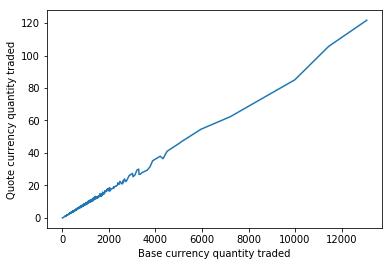

In [15]:
sns.lineplot(x=uniswap_df["Base currency quantity traded"], y=uniswap_df["Quote currency quantity traded"], data=uniswap_df)
plt.show()

This shows the relation between UNI/WETH as a function of volume traded. The slope increases when greater than 10000UNI is traded. This helps us decide regarding the volume we should trade

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


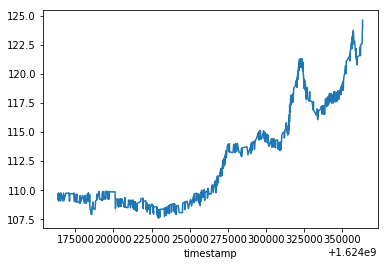

In [16]:
sns.lineplot(x=uniswap_df["timestamp"], y=uniswap_df["Base currency quantity traded"]/uniswap_df["Quote currency quantity traded"], data=uniswap_df)
plt.show()

This shows the value of UNI/WETH is increasing. This shows that UNI is appreciating wrt ETH

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


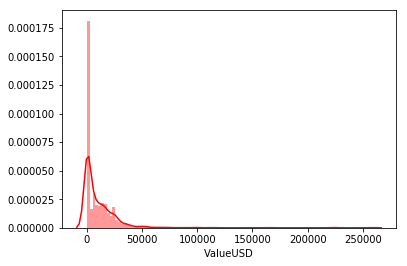

In [17]:
sns.distplot(uniswap_df["ValueUSD"], color ='red', bins = 100)

In [18]:
uniswap_df["ValueUSD"].median()

4802.939103782887

This Density plot shows majority of the transaction value is between 0-50000USD. The median transaction value is approx. $4802.94

All conclusion is based on Previous 1000 Transactions

In [26]:
print(requests.__version__)
print(json.__version__)
print(pd.__version__)
print(sns.__version__)

2.19.1
2.0.9
0.23.4
0.9.0
